In [3]:
import pandas as pd
import re
wikipedia_df = pd.read_excel('wikipedia_dataset_flat.xlsx')
#wikipedia_df.head()

**ADDING NEW COLUMNS**

In [4]:
#Adding the language column by creating a function to extract the language code from the page url
def extract_language(url):
    language_mapping = {
        'en': 'English',
        'de': 'German',
        'zh': 'Chinese',
        'ja': 'Japanese',
        'es': 'Spanish',
        'fr': 'French',
        'ru': 'Russian',
    }

    match = re.search(r'_([a-z]{2})\.', url)  # Extract two-letter language code
    if match:
        language_code = match.group(1)
        return language_mapping.get(language_code, None)
    return None


wikipedia_df['page_language'] = wikipedia_df['page'].apply(extract_language)

wikipedia_df.head()

,date,page,visits,page_language
0,2016-01-01,.xxx_en.wikipedia.org_all-access_all-agents,7089.0,English
1,2016-01-01,.xxx_en.wikipedia.org_mobile-web_all-agents,6182.0,English
2,2016-01-01,1._Juli_de.wikipedia.org_desktop_all-agents,20.0,German
3,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_all-acces...,5363.0,English
4,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...,3186.0,English


In [5]:
#Adding the device_type column by creating a function to extract the device type from the page url
def extract_device_type(url):
    match = re.search(r'_(mobile-web|desktop|all-access)', url) # Extract device type from page url
    if match:
        return match.group(1)
    return None

wikipedia_df['access_device_type'] = wikipedia_df['page'].apply(extract_device_type)

wikipedia_df.head()

,date,page,visits,page_language,access_device_type
0,2016-01-01,.xxx_en.wikipedia.org_all-access_all-agents,7089.0,English,all-access
1,2016-01-01,.xxx_en.wikipedia.org_mobile-web_all-agents,6182.0,English,mobile-web
2,2016-01-01,1._Juli_de.wikipedia.org_desktop_all-agents,20.0,German,desktop
3,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_all-acces...,5363.0,English,all-access
4,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...,3186.0,English,desktop


In [6]:
#Adding the day_of_the_week and month columns by using the .to_datetime function from pandas
wikipedia_df['date'] = pd.to_datetime(wikipedia_df['date'], format='%d/%m/%Y %I:%M:%S %p')

wikipedia_df['day_of_the_week'] = wikipedia_df['date'].dt.day_name()
wikipedia_df['month'] = wikipedia_df['date'].dt.month_name()
wikipedia_df.head()

,date,page,visits,page_language,access_device_type,day_of_the_week,month
0,2016-01-01,.xxx_en.wikipedia.org_all-access_all-agents,7089.0,English,all-access,Friday,January
1,2016-01-01,.xxx_en.wikipedia.org_mobile-web_all-agents,6182.0,English,mobile-web,Friday,January
2,2016-01-01,1._Juli_de.wikipedia.org_desktop_all-agents,20.0,German,desktop,Friday,January
3,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_all-acces...,5363.0,English,all-access,Friday,January
4,2016-01-01,2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...,3186.0,English,desktop,Friday,January


In [7]:
wikipedia_df["page_language"].fillna("N/A", inplace=True) # Replace null values in page_language column with "N/A"
wikipedia_df[560:565]

,date,page,visits,page_language,access_device_type,day_of_the_week,month
560,2016-01-01,Fifty_Shades_of_Grey_en.wikipedia.org_mobile-w...,10233.0,English,mobile-web,Friday,January
561,2016-01-01,File:1x1.png_commons.wikimedia.org_all-access_...,18153.0,N/A,all-access,Friday,January
562,2016-01-01,File:Transparent.gif_commons.wikimedia.org_all...,11491.0,N/A,all-access,Friday,January
563,2016-01-01,File:Transparent.gif_commons.wikimedia.org_des...,10494.0,N/A,desktop,Friday,January
564,2016-01-01,First_Amendment_to_the_United_States_Constitut...,2930.0,English,all-access,Friday,January


In [8]:
# Converting dataframe with newly created columns to an excel workbook
#wikipedia_df.to_excel('wikipedia_dataset_new.xlsx')

# **ANALYSIS STAGE**

In [9]:
#Creating a pivot table to analyze distribution of daily page visits
daily_page_visits = wikipedia_df.pivot_table(index='date', values='visits', aggfunc='sum')
daily_page_visits = daily_page_visits.reset_index()
daily_page_visits

,date,visits
0,2016-01-01,70110063.0
1,2016-01-02,75431128.0
2,2016-01-03,75690625.0
3,2016-01-04,80823742.0
4,2016-01-05,78846869.0
...,...,...
361,2016-12-27,92153347.0
362,2016-12-28,90990150.0
363,2016-12-29,88470711.0
364,2016-12-30,83924070.0


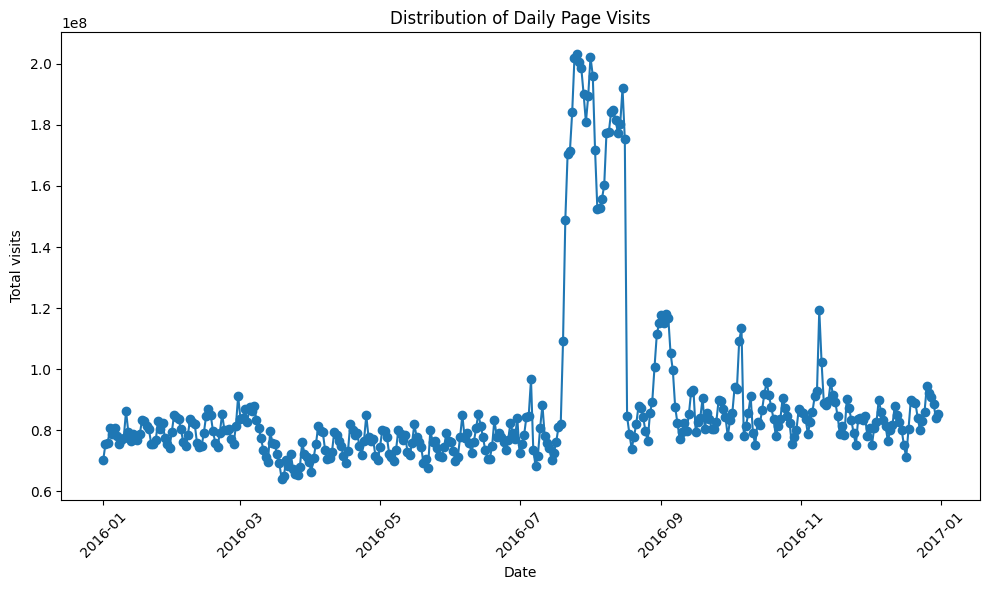

In [10]:
#Using a time series plot to visualize the distribution of daily page visits throughout the year
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(daily_page_visits['date'], daily_page_visits['visits'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total visits')
plt.title('Distribution of Daily Page Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**USING STANDARD DEVIATION TO DETERMINE WEB PAGES WITH RELATIVELY STEADY NUMBER OF VISITS THROUGHOUT THE YEAR**

In [11]:
#Calculating standard deviation and coefficient of variation to determine the page with steady number of visits throughout the year
page_stats = wikipedia_df.groupby('page')['visits'].agg(['mean', 'std'])
page_stats.reset_index(inplace=True)
page_stats.rename(columns={'std':'standard_deviation'}, inplace=True)

#page_stats['co_variation'] = page_stats['std'] / page_stats['mean']

page_stats = page_stats.sort_values('standard_deviation')
page_stats.head()


,page,mean,standard_deviation
458,Guns_N'_Roses_es.wikipedia.org_all-access_spider,20.489071,18.880261
1479,è…”å®¤ç—‡å€™ç¾¤_zh.wikipedia.org_desktop_all-a...,33.786885,43.338659
1449,æ–‰è—¤æ•è±ª_ja.wikipedia.org_desktop_all-agents,129.005464,54.582952
1478,è…”å®¤ç—‡å€™ç¾¤_zh.wikipedia.org_all-access_al...,58.844262,115.991168
17,2015å¹´å…«ä»™æ¨‚åœ’æ´¾å°ç²‰å¡µçˆ†ç‚¸äº‹æ•…_zh...,165.756831,131.798366


**Plot of two(2) pages with relatively steady number of visits throughout the year**

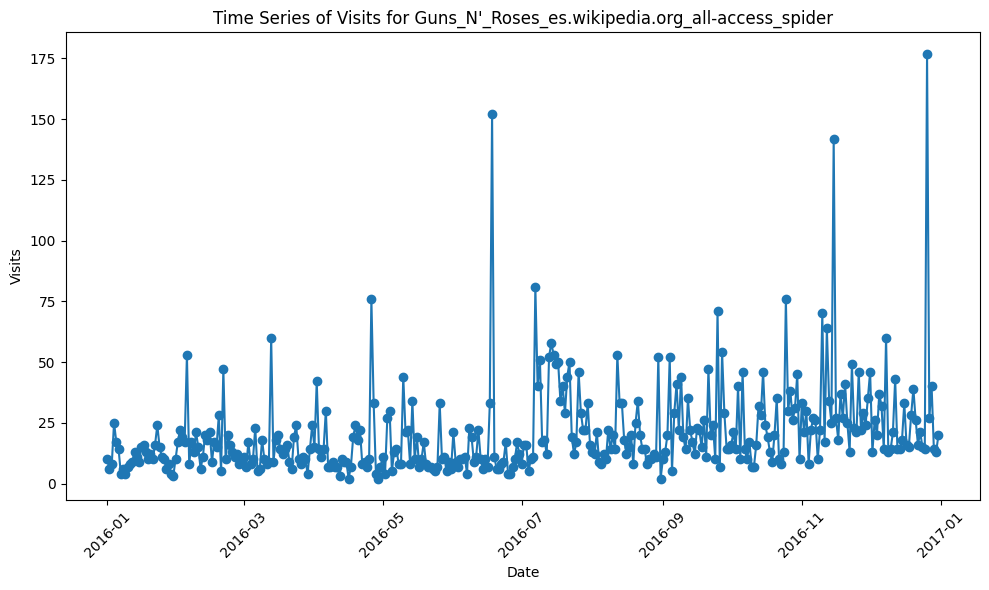

In [12]:
page_name = "Guns_N'_Roses_es.wikipedia.org_all-access_spider"
page_data = wikipedia_df[wikipedia_df['page'] == page_name]

plt.figure(figsize=(10, 6))
plt.plot(page_data['date'], page_data['visits'], marker='o')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title(f'Time Series of Visits for {page_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



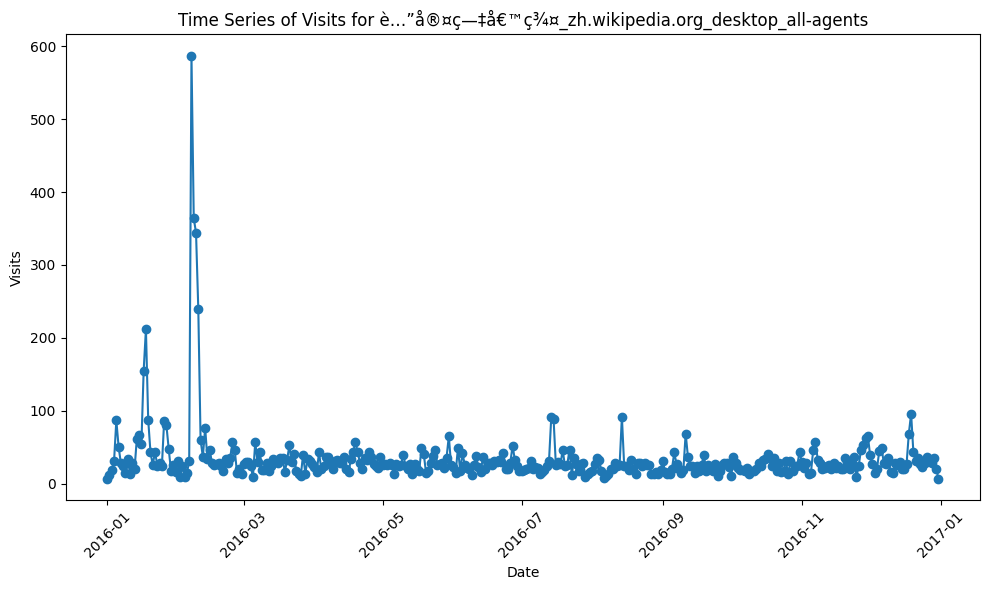

In [13]:
page_name = "è…”å®¤ç—‡å€™ç¾¤_zh.wikipedia.org_desktop_all-agents"
page_data = wikipedia_df[wikipedia_df['page'] == page_name]

plt.figure(figsize=(10, 6))
plt.plot(page_data['date'], page_data['visits'], marker='o')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title(f'Time Series of Visits for {page_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Calculating the increase in average number of visits from the first half of the year to the second half of the year to determine the pages with significantly higher number of visits later in the year compared to earlier in the year.**

In [35]:
wikipedia_df['month'] = wikipedia_df['date'].dt.month  #Changing values in month column to show the month numbers instead of the month name

first_half_avg = wikipedia_df[wikipedia_df['month'] <= 6].groupby('page')['visits'].mean()  #Average number of visits per page for first half of the year
second_half_avg = wikipedia_df[wikipedia_df['month'] > 6].groupby('page')['visits'].mean()  #Average number of visits per page for second half of the year

increase_in_visits = second_half_avg - first_half_avg #Average increase in visits
increased_visits = increase_in_visits[increase_in_visits > 0].reset_index()
increased_visits.rename(columns={'visits':'avg_increase_in_visits'}, inplace=True)
increased_visits = increased_visits.sort_values('avg_increase_in_visits', ascending=False)
increased_visits.head()

,page,avg_increase_in_visits
232,Main_Page_en.wikipedia.org_desktop_all-agents,1.187031e+07
230,Main_Page_en.wikipedia.org_all-access_all-agents,1.059542e+07
449,Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°_ru.wikiped...,2.037046e+06
448,Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°_ru.wikiped...,1.894615e+06
353,Special:Search_en.wikipedia.org_all-access_all...,3.379599e+05


**Plot of two pages that had significantly higher number of visits later in the year compared to earlier in the year**

C:\Users\willi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\willi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


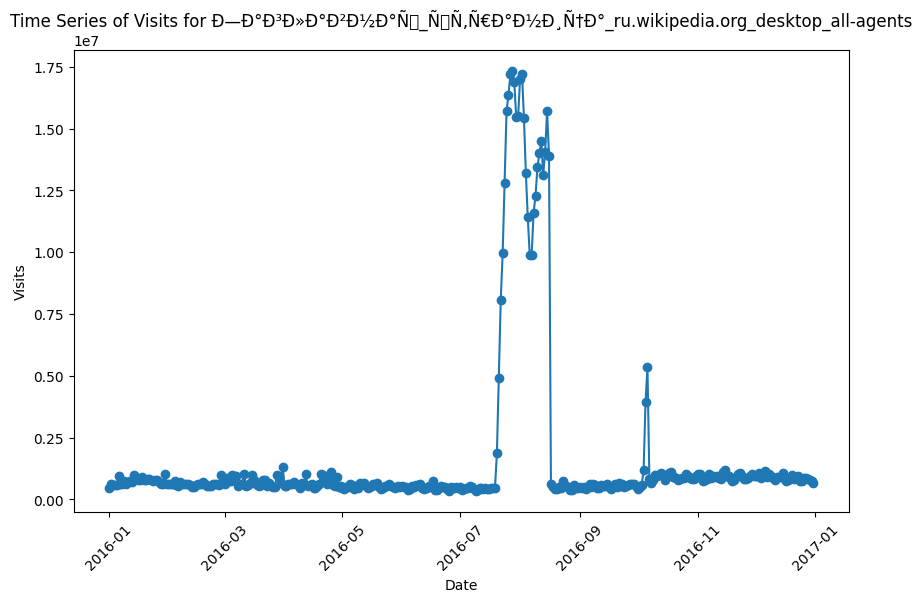

In [15]:
page_name = "Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°_ru.wikipedia.org_desktop_all-agents"
page_data = wikipedia_df[wikipedia_df['page'] == page_name]

plt.figure(figsize=(10, 6))
plt.plot(page_data['date'], page_data['visits'], marker='o')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title(f'Time Series of Visits for {page_name}')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

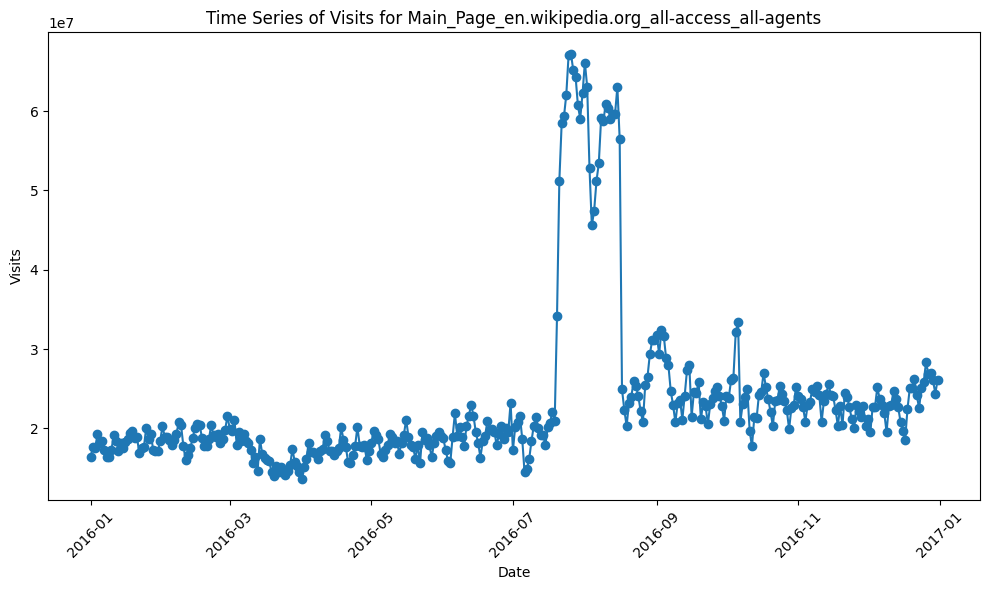

In [40]:
page_name = "Main_Page_en.wikipedia.org_all-access_all-agents"
page_data = wikipedia_df[wikipedia_df['page'] == page_name]

plt.figure(figsize=(10, 6))
plt.plot(page_data['date'], page_data['visits'], marker='o')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title(f'Time Series of Visits for {page_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Calculating the decrease in average number of visits from the first half of the year to the second half of the year to determine the pages with significantly lower number of visits later in the year compared to earlier in the year.**

In [47]:
decrease_in_visits = first_half_avg - second_half_avg #Average decrease in visits
decreased_visits = decrease_in_visits[decrease_in_visits > 0].reset_index()
decreased_visits.rename(columns={'visits':'avg_decrease_in_visits'}, inplace=True)
decreased_visits = decreased_visits.sort_values('avg_decrease_in_visits', ascending=False)
decreased_visits.head()

,page,avg_decrease_in_visits
518,Main_Page_en.wikipedia.org_mobile-web_all-agents,1.325454e+06
867,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,3.239372e+05
866,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2.578211e+05
877,WikipÃ©dia:Accueil_principal_fr.wikipedia.org_...,2.556716e+05
868,Wikipedia:Portada_es.wikipedia.org_all-access_...,2.429549e+05


**Plot of two pages that had significantly lower number of visits later in the year compared to earlier in the year**

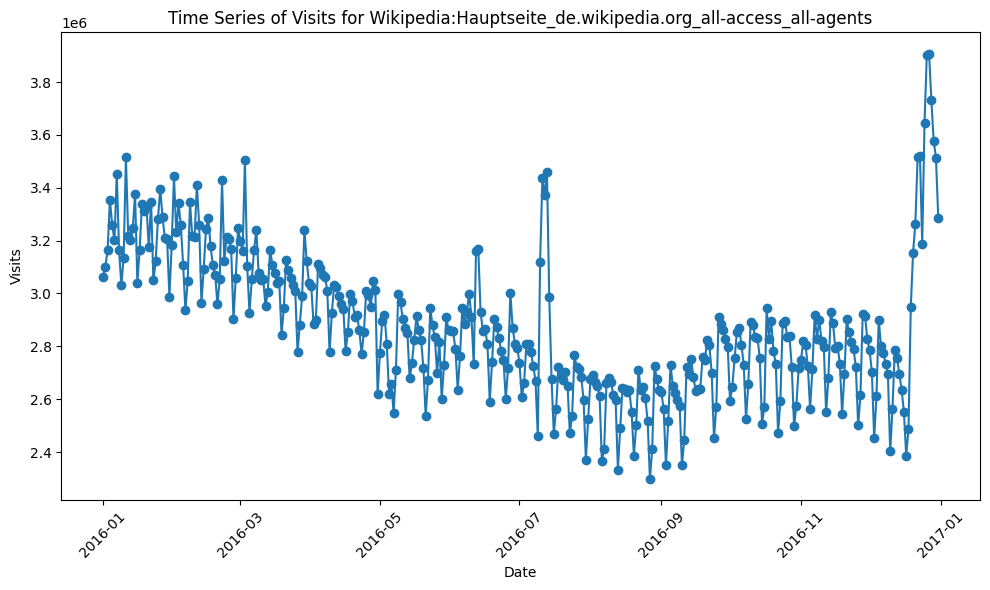

In [18]:
page_name = "Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents"
page_data = wikipedia_df[wikipedia_df['page'] == page_name]

plt.figure(figsize=(10, 6))
plt.plot(page_data['date'], page_data['visits'], marker='o')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title(f'Time Series of Visits for {page_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

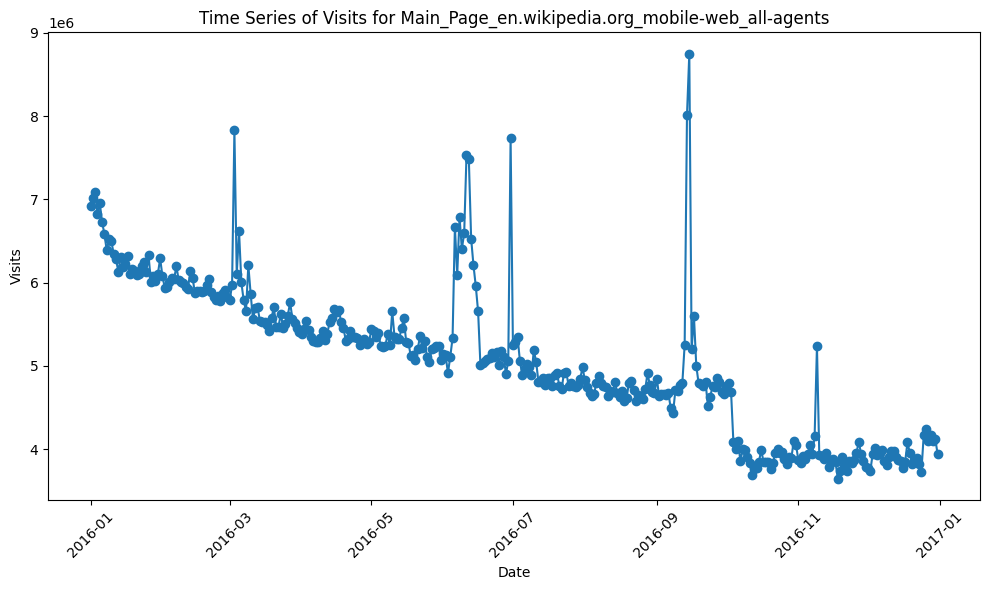

In [19]:
page_name = "Main_Page_en.wikipedia.org_mobile-web_all-agents"
page_data = wikipedia_df[wikipedia_df['page'] == page_name]

plt.figure(figsize=(10, 6))
plt.plot(page_data['date'], page_data['visits'], marker='o')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title(f'Time Series of Visits for {page_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Identifying page pairs with high correlation in number of visits and plotting one pair**

In [20]:
#pivot table with date, page and total visits per date
new_pivot = wikipedia_df.pivot(index='date', columns='page', values='visits')

#Calculate correlation matrix for visit counts of different webpages
correlation_matrix = new_pivot.corr()

#identify high correlation pairs and display as a list
high_correlation_pairs = (correlation_matrix.abs() > 0.8).stack()
webpage_pairs = high_correlation_pairs[high_correlation_pairs].index.tolist()

print("Webpage pairs with high correlation:")
for pair in webpage_pairs:
    print(f"{pair[0]} and {pair[1]}")


Webpage pairs with high correlation:
.xxx_en.wikipedia.org_all-access_all-agents and .xxx_en.wikipedia.org_all-access_all-agents
.xxx_en.wikipedia.org_all-access_all-agents and .xxx_en.wikipedia.org_mobile-web_all-agents
.xxx_en.wikipedia.org_mobile-web_all-agents and .xxx_en.wikipedia.org_all-access_all-agents
.xxx_en.wikipedia.org_mobile-web_all-agents and .xxx_en.wikipedia.org_mobile-web_all-agents
1._Juli_de.wikipedia.org_desktop_all-agents and 1._Juli_de.wikipedia.org_desktop_all-agents
1._Juli_de.wikipedia.org_desktop_all-agents and Battle_of_the_Somme_en.wikipedia.org_all-access_all-agents
1._Juli_de.wikipedia.org_desktop_all-agents and Canada_Day_en.wikipedia.org_desktop_all-agents
1._Juli_de.wikipedia.org_desktop_all-agents and Olivia_de_Havilland_en.wikipedia.org_desktop_all-agents
2014_FIFA_World_Cup_en.wikipedia.org_all-access_all-agents and 2014_FIFA_World_Cup_en.wikipedia.org_all-access_all-agents
2014_FIFA_World_Cup_en.wikipedia.org_all-access_all-agents and 2014_FIFA_Wo

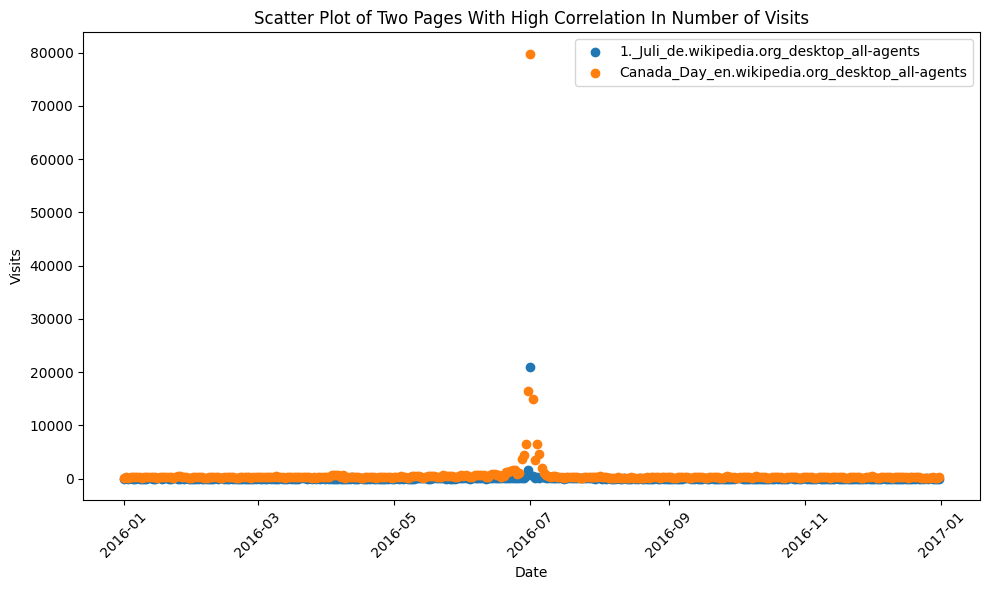

In [21]:
page_1 = "1._Juli_de.wikipedia.org_desktop_all-agents"
page_2 = "Canada_Day_en.wikipedia.org_desktop_all-agents"
page_data1 = wikipedia_df[wikipedia_df['page'] == page_1]
page_data2 = wikipedia_df[wikipedia_df['page'] == page_2]

plt.figure(figsize=(10, 6))
plt.scatter(page_data1['date'], page_data1['visits'], label=page_1)
plt.scatter(page_data2['date'], page_data2['visits'], label=page_2)
plt.xlabel('Date')
plt.ylabel('Visits')
plt.legend()
plt.title('Scatter Plot of Two Pages With High Correlation In Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **PROJECT QUESTIONS**

In [22]:
#Most trending search topics on New Year's Day
new_years_day = wikipedia_df[wikipedia_df['month'] == 1]
new_years_day = new_years_day[new_years_day['date'].dt.day == 1]
new_years_day = new_years_day.sort_values('visits', ascending=False)
new_years_day.head(50)

,date,page,visits,page_language,access_device_type,day_of_the_week,month
912,2016-01-01,Main_Page_en.wikipedia.org_all-access_all-agents,16357307.0,English,all-access,Friday,1
914,2016-01-01,Main_Page_en.wikipedia.org_desktop_all-agents,9170612.0,English,desktop,Friday,1
915,2016-01-01,Main_Page_en.wikipedia.org_mobile-web_all-agents,6920930.0,English,mobile-web,Friday,1
1461,2016-01-01,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,3062989.0,German,all-access,Friday,1
1463,2016-01-01,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,2306896.0,German,mobile-web,Friday,1
1249,2016-01-01,Special:Search_en.wikipedia.org_all-access_all...,1794204.0,English,all-access,Friday,1
1447,2016-01-01,WikipÃ©dia:Accueil_principal_fr.wikipedia.org_...,1532934.0,French,all-access,Friday,1
1250,2016-01-01,Special:Search_en.wikipedia.org_desktop_all-ag...,1401667.0,English,desktop,Friday,1
1449,2016-01-01,WikipÃ©dia:Accueil_principal_fr.wikipedia.org_...,1253720.0,French,mobile-web,Friday,1
1464,2016-01-01,Wikipedia:Portada_es.wikipedia.org_all-access_...,1214388.0,Spanish,all-access,Friday,1


In [23]:
#Most trending search topics on November 8, 2016
november = wikipedia_df[wikipedia_df['month'] == 11]
november_eight = november[november['date'].dt.day == 8]
november_eight = november_eight.groupby('page')['visits'].sum()
november_eight = november_eight.reset_index()
november_eight = november_eight.sort_values('visits', ascending=False)
november_eight.head(50)

,page,visits
748,Main_Page_en.wikipedia.org_all-access_all-agents,24600978.0
750,Main_Page_en.wikipedia.org_desktop_all-agents,20367321.0
751,Main_Page_en.wikipedia.org_mobile-web_all-agents,4161059.0
1292,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2829085.0
1070,Special:Search_en.wikipedia.org_all-access_all...,2246978.0
1294,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,1796959.0
1071,Special:Search_en.wikipedia.org_desktop_all-ag...,1796203.0
1305,WikipÃ©dia:Accueil_principal_fr.wikipedia.org_...,1464684.0
1363,Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°_ru.wikiped...,1379041.0
1295,Wikipedia:Portada_es.wikipedia.org_all-access_...,1182277.0


In [45]:
#Page with biggest decline in visits
first_half_total = wikipedia_df[wikipedia_df['month'] <= 6].groupby('page')['visits'].sum()  #Total number of visits per page for first half of the year
second_half_total = wikipedia_df[wikipedia_df['month'] > 6].groupby('page')['visits'].sum()  #Total number of visits per page for second half of the year

decline_in_visits = first_half_total - second_half_total #decrease in visits
biggest_decline = decline_in_visits[decline_in_visits > 0].reset_index()
biggest_decline.rename(columns={'visits':'decline_in_visits'}, inplace=True)
biggest_decline = biggest_decline.sort_values('decline_in_visits', ascending=False)
biggest_decline.head()

,page,decline_in_visits
504,Main_Page_en.wikipedia.org_mobile-web_all-agents,232396427.0
845,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,55292204.0
855,WikipÃ©dia:Accueil_principal_fr.wikipedia.org_...,44675111.0
846,Wikipedia:Portada_es.wikipedia.org_all-access_...,41958883.0
844,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,41423392.0


In [46]:
#Page with biggest increase in visits
increase_in_visits = second_half_total - first_half_total #Increase in visits
biggest_increase = increase_in_visits[increase_in_visits > 0].reset_index()
biggest_increase.rename(columns={'visits':'increase_in_visits'}, inplace=True)
biggest_increase = biggest_increase.sort_values('increase_in_visits', ascending=False)
biggest_increase.head()

,page,increase_in_visits
246,Main_Page_en.wikipedia.org_desktop_all-agents,2.208363e+09
244,Main_Page_en.wikipedia.org_all-access_all-agents,1.985679e+09
473,Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°_ru.wikiped...,3.760723e+08
472,Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°_ru.wikiped...,3.511642e+08
373,Special:Search_en.wikipedia.org_all-access_all...,6.634773e+07
